In [79]:
# imports
import bz2

import IPython
import pickle5 as pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [80]:
# functions
# Load any compressed pickle file
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data


In [81]:
df = decompress_pickle('6nutrients.pbz2')

In [82]:
df1 = df.copy()
# add a column for value counts by id
df1['id_count'] = df.groupby('id')['id'].transform('count')

df1.head()

,id,date,total.calories,total.carbs,total.fat,total.protein,total.sodium,total.sugar,goal.calories,goal.carbs,goal.fat,goal.protein,goal.sodium,goal.sugar,id_count
0,1,2014-09-14,2924.0,340.0,114.0,186.0,3658.0,109.0,3173.0,396.0,105.0,160.0,2300.0,119.0,174
1,1,2014-09-15,2430.0,96.0,37.0,50.0,855.0,63.0,1572.0,196.0,52.0,79.0,2300.0,59.0,174
2,1,2014-09-16,1862.0,158.0,54.0,114.0,2215.0,100.0,1832.0,229.0,61.0,92.0,2300.0,69.0,174
3,1,2014-09-17,2251.0,187.0,60.0,98.0,1765.0,105.0,1685.0,210.0,56.0,85.0,2300.0,63.0,174
4,1,2014-09-18,2001.0,113.0,81.0,202.0,1101.0,71.0,1597.0,199.0,53.0,80.0,2300.0,60.0,174


In [83]:
id_1 = df1[df1["id"] == 1]
id_1 = id_1.drop(columns=['id_count','id'])

id_1['date'] = pd.to_datetime(id_1.pop('date'), format='%Y-%m-%d')

date_time = pd.to_datetime(id_1.pop('date'), format='%Y-%m-%d')
id_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total.calories  174 non-null    float64
 1   total.carbs     174 non-null    float64
 2   total.fat       174 non-null    float64
 3   total.protein   174 non-null    float64
 4   total.sodium    174 non-null    float64
 5   total.sugar     174 non-null    float64
 6   goal.calories   174 non-null    float64
 7   goal.carbs      174 non-null    float64
 8   goal.fat        174 non-null    float64
 9   goal.protein    174 non-null    float64
 10  goal.sodium     174 non-null    float64
 11  goal.sugar      174 non-null    float64
dtypes: float64(12)
memory usage: 17.7 KB


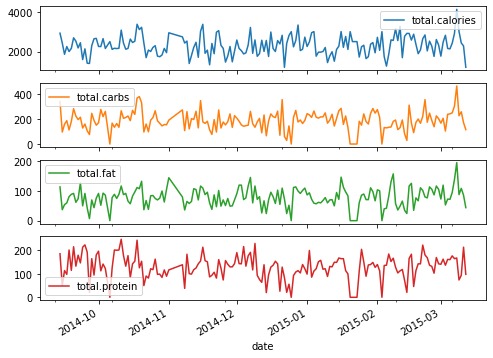

In [84]:
plot_cols = ['total.calories', 'total.carbs','total.fat','total.protein']
plot_features = id_1[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [85]:
id_1.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
total.calories,174.0,2308.908046,493.862004,1203.0,1992.75,2264.5,2584.75,4122.0
total.carbs,174.0,185.431034,77.583096,0.0,142.50,186.5,232.75,464.0
total.fat,174.0,77.942529,32.913218,0.0,59.25,77.0,100.00,196.0
total.protein,174.0,128.781609,51.942815,0.0,99.00,132.5,161.75,248.0
total.sodium,174.0,2071.764368,940.908948,0.0,1539.50,2051.0,2760.25,5787.0
total.sugar,174.0,81.764368,38.573804,0.0,55.25,78.5,110.00,183.0
goal.calories,174.0,2155.660920,524.697860,1200.0,1793.00,2076.5,2447.00,4578.0
goal.carbs,174.0,268.005747,66.094126,146.0,220.75,258.5,304.75,572.0
goal.fat,174.0,71.678161,17.440233,40.0,60.00,69.0,81.75,153.0
goal.protein,174.0,109.362069,29.798959,60.0,90.00,104.5,123.75,274.0


<AxesSubplot:xlabel='goal.calories', ylabel='total.calories'>

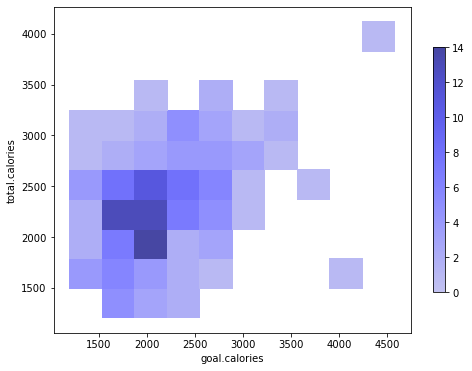

<AxesSubplot:xlabel='goal.carbs', ylabel='total.carbs'>

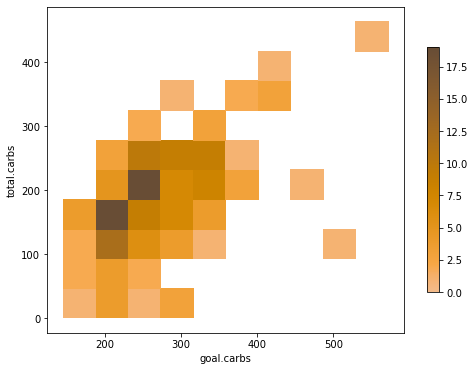

<AxesSubplot:xlabel='goal.fat', ylabel='total.fat'>

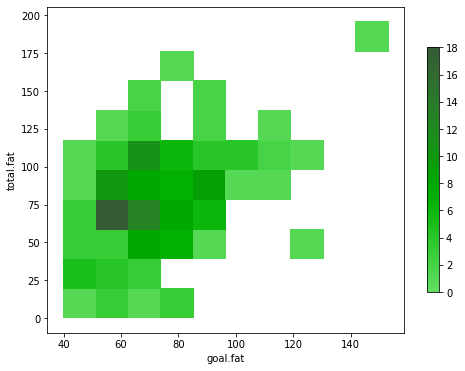

<AxesSubplot:xlabel='goal.protein', ylabel='total.protein'>

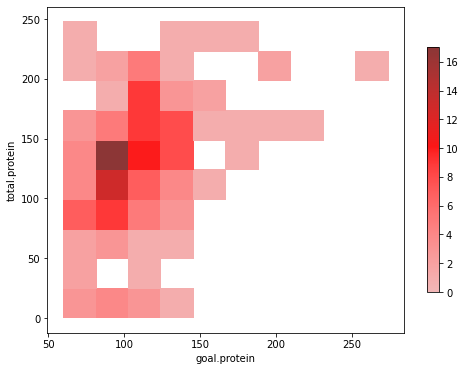

In [86]:
# Observering totals vs. goals
sns.histplot(
    id_1, x="goal.calories", y="total.calories",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="blue"
)
plt.savefig('calories.png')
plt.show()
sns.histplot(
    id_1, x="goal.carbs", y="total.carbs",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="orange"
)
plt.savefig('carbs.png')
plt.show()
sns.histplot(
    id_1, x="goal.fat", y="total.fat",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="green"
)
plt.savefig('fat.png')
plt.show()
sns.histplot(
    id_1, x="goal.protein", y="total.protein",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="red"
)
plt.savefig('protein.png')
plt.show()

Text(0.5, 0, 'Time [d]')

Text(0.5, 1.0, 'Time of month signal')

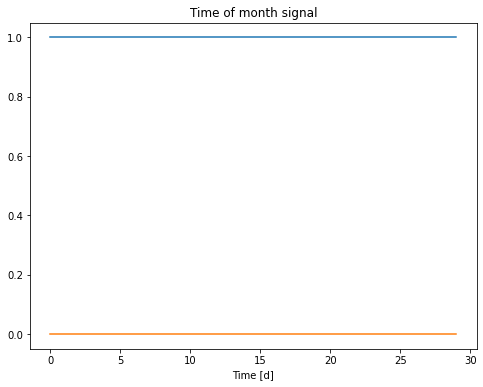

In [87]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

id_1['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
id_1['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
id_1['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
id_1['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(id_1['Day sin'])[:30])
plt.plot(np.array(id_1['Day cos'])[:30])
plt.xlabel('Time [d]')
plt.title('Time of month signal')

(0.0, 5000.0)

(0.1, 5479.618042131099)

([<matplotlib.axis.XTick at 0x7ec245c24340>,
 [Text(1.0, 0, '1/Year'), Text(365.2524, 0, '1/day')])

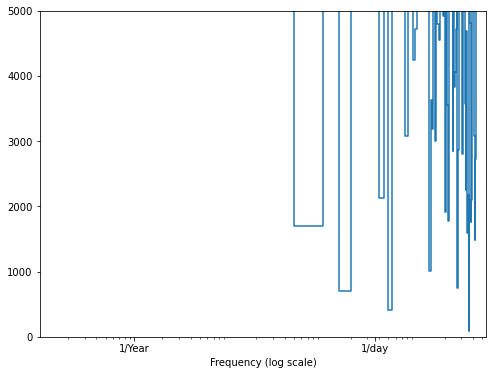

In [88]:
fft = tf.signal.rfft(id_1['total.calories'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(id_1['total.calories'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/hours_per_year

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 5000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [89]:
column_indices = {name: i for i, name in enumerate(id_1.columns)}

n = len(id_1)
train_df = id_1[0:int(n*0.7)]
val_df = id_1[int(n*0.7):int(n*0.9)]
test_df = id_1[int(n*0.9):]

num_features = id_1.shape[1]

In [90]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

<Figure size 864x432 with 0 Axes>

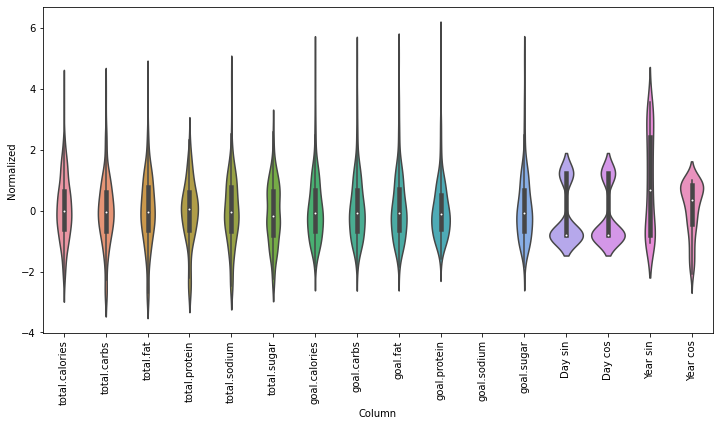

In [91]:
df_std = (id_1 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(id_1.keys(), rotation=90)
plt.savefig('violin.png')
plt.show()

In [92]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [93]:
# given 15 days of input, predict the next 15 days
w1 = WindowGenerator(input_width=7, label_width=1, shift=1, label_columns=['total.calories'])
w1

# given 15 days of input, predict the next 1 day
w2 = WindowGenerator(input_width=15, label_width=1, shift=1,
                     label_columns=['total.calories'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['total.calories']

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['total.calories']

In [94]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[16:16+w2.total_window_size]),
                           np.array(train_df[32:32+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 16, 16)
Inputs shape: (3, 15, 16)
labels shape: (3, 1, 1)


In [95]:
w2.example = example_inputs, example_labels

In [96]:
def plot(self, model=None, plot_col='total.calories', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      print("there is a model")
      predictions = model(inputs)
      # print(predictions)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
    else:
        print("no model")

    if n == 0:
      plt.legend()

  plt.xlabel('Time [d]')

WindowGenerator.plot = plot

no model
no model
no model


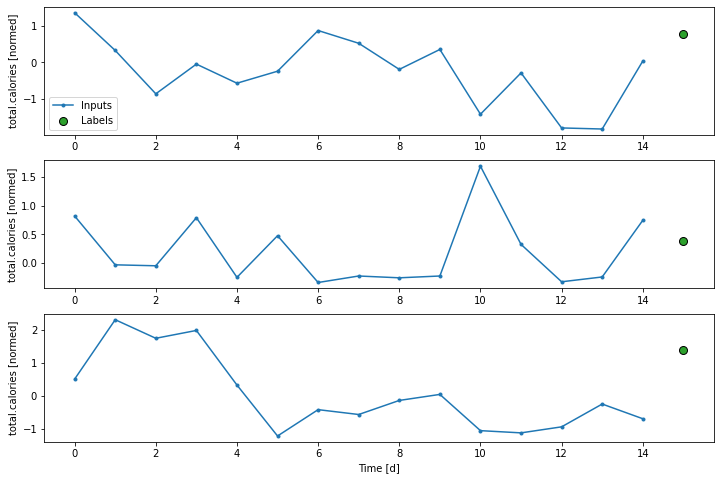

In [97]:
w2.plot()

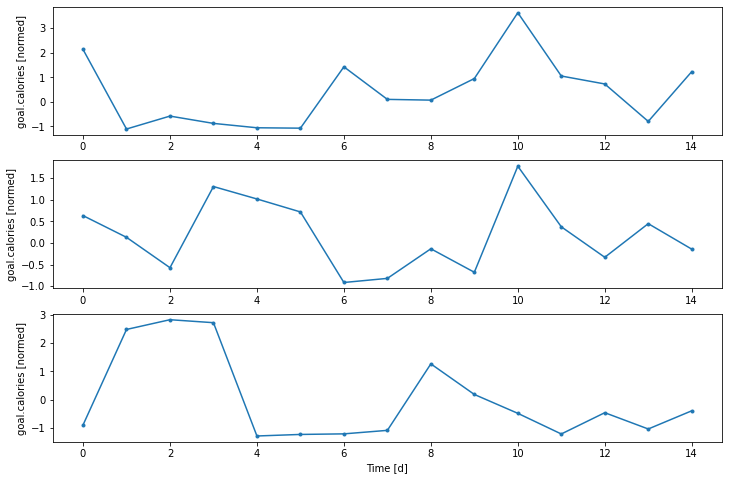

In [98]:
w2.plot(plot_col='goal.calories')

In [99]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [100]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [101]:
# Each element is an (inputs, label) pair
w2.train.element_spec

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['total.calories']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['total.calories']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(TensorSpec(shape=(None, 15, 16), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [102]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 15, 16)
Labels shape (batch, time, features): (32, 1, 1)


In [103]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['total.calories'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['total.calories']

In [104]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 16)
Labels shape (batch, time, features): (32, 1, 1)


In [105]:
print('TensorFlow version: %s' % tf.__version__)
print('Keras version: %s' % tf.keras.__version__)

TensorFlow version: 2.4.1
Keras version: 2.4.0


In [106]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [107]:
baseline = Baseline(label_index=0)

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 1s 19ms/step - loss: 1.6866 - mean_absolute_error: 1.0642


In [108]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['total.calories'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['total.calories']

In [109]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 15, 16)
Output shape: (32, 15, 1)


there is a model
there is a model
there is a model


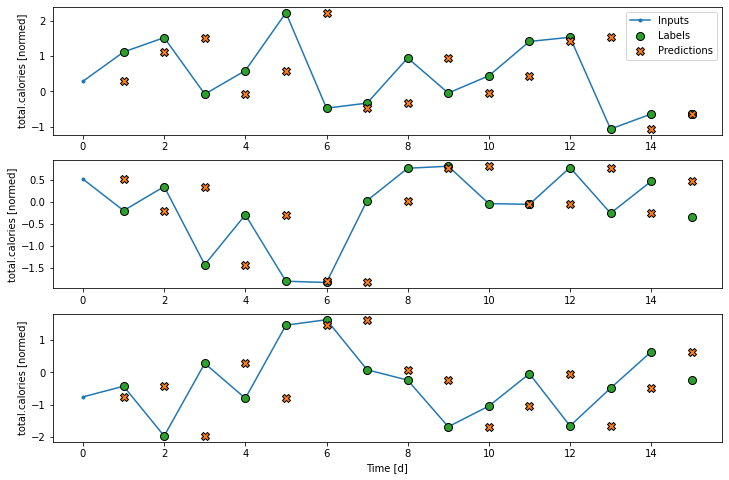

In [110]:
wide_window.plot(baseline)

In [111]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [112]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 16)
Output shape: (32, 1, 1)


In [113]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [114]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
2/2 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan


In [115]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 15, 16)
Output shape: (32, 15, 1)


there is a model
there is a model
there is a model


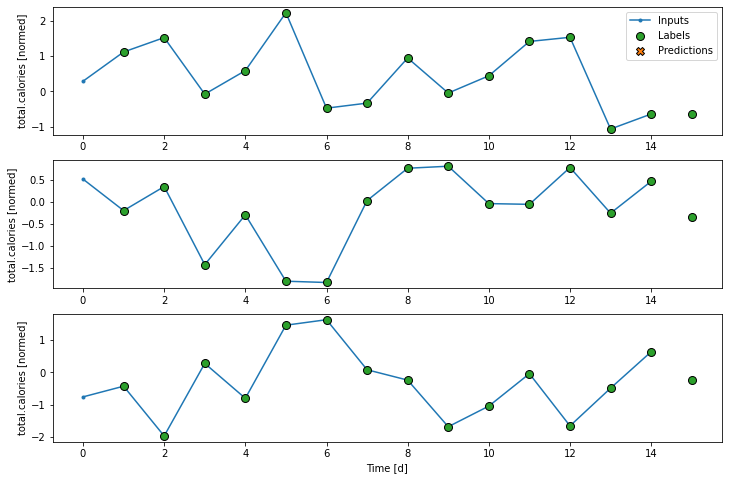

In [116]:
wide_window.plot(model=linear)

<BarContainer object of 16 artists>

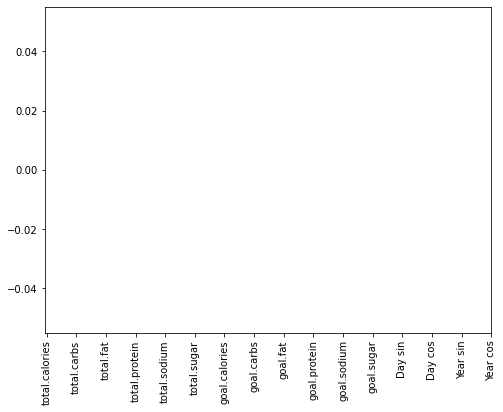

In [117]:
#weight of each input
linear_test = linear.layers[0].kernel[:,0].numpy()
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [118]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
4/4 [==============================] - 7s 654ms/step - loss: 0.8909 - mean_absolute_error: 0.7411 - val_loss: 1.1088 - val_mean_absolute_error: 0.9093
Epoch 2/20
4/4 [==============================] - 1s 364ms/step - loss: 1.0059 - mean_absolute_error: 0.8021 - val_loss: 1.1089 - val_mean_absolute_error: 0.9094
Epoch 3/20
2/2 [==============================] - 0s 18ms/step -

In [119]:
CONV_WIDTH = 15
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['total.calories'])

conv_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['total.calories']

no model
no model
no model


Text(0.5, 1.0, 'Given 15d as input, predict 1d into the future.')

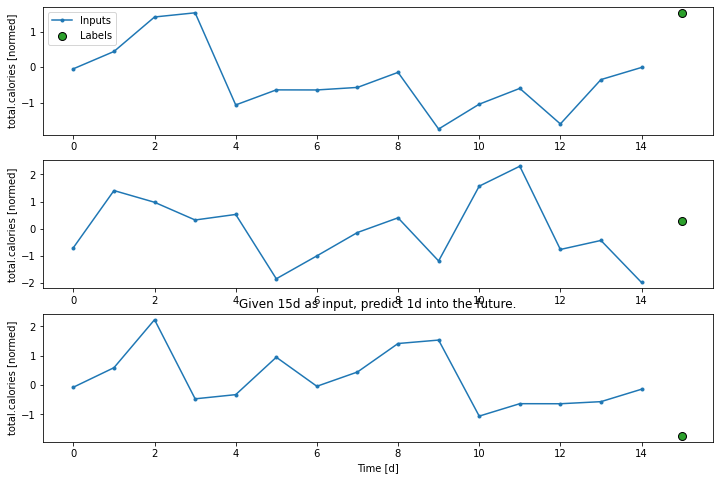

In [120]:
conv_window.plot()
plt.title("Given 15d as input, predict 1d into the future.")

In [121]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [122]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 15, 16)
Output shape: (32, 1, 1)


In [123]:
history = compile_and_fit(multi_step_dense, conv_window)

from IPython.display import clear_output
clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 355ms/step - loss: nan - mean_absolute_error: nan


there is a model
there is a model
there is a model


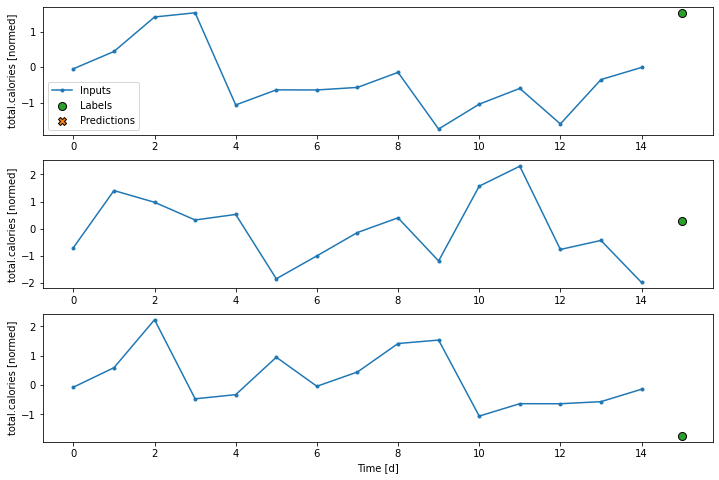

In [124]:
conv_window.plot(multi_step_dense)

In [125]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 15, 16)
Output shape: (32, 1, 1)


In [126]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [127]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 15, 16)
Output shape: (32, 1, 1)


In [128]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 307ms/step - loss: 1.4176 - mean_absolute_error: 1.0718


In [129]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 15, 16)
Labels shape: (32, 15, 1)
Output shape: (32, 1, 1)


In [130]:
LABEL_WIDTH = 15

In [131]:
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['total.calories'])

wide_conv_window

Total window size: 30
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Label indices: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Label column name(s): ['total.calories']

In [132]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 29, 16)
Labels shape: (32, 15, 1)
Output shape: (32, 15, 1)


there is a model
there is a model
there is a model


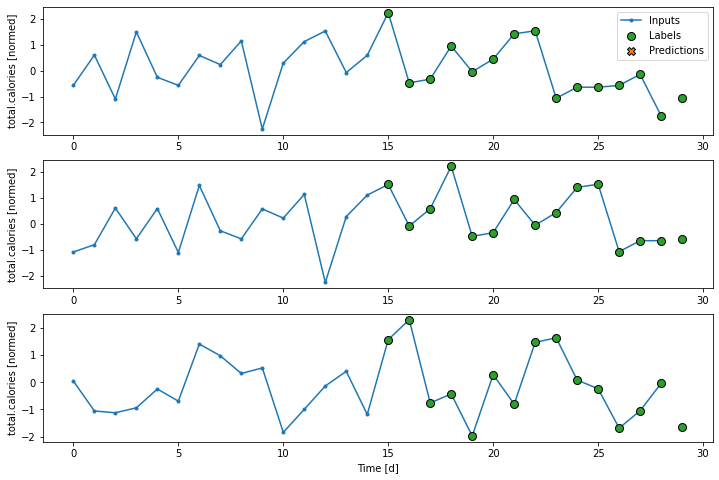

In [133]:
wide_conv_window.plot(conv_model)

In [134]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [135]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 15, 16)
Output shape: (32, 15, 1)


In [136]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 2s 2s/step - loss: nan - mean_absolute_error: nan


Text(0, 0.5, 'mean_absolute_error [total.calories, normalized]')

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x7ec248c2f4c0>,
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Linear'),
  Text(2, 0, 'Dense'),
  Text(3, 0, 'Multi step dense'),
  Text(4, 0, 'Conv'),
  Text(5, 0, 'LSTM')])

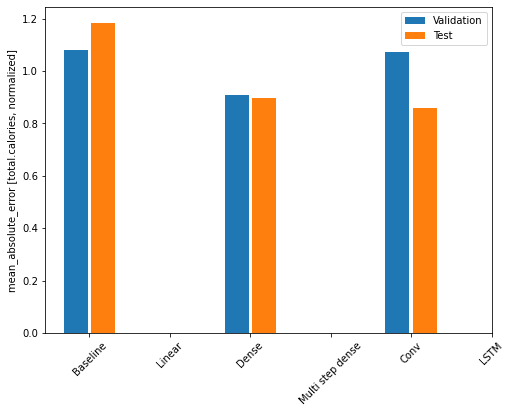

In [137]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [total.calories, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()
